___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [211]:
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data, wb
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [252]:
df = pd.read_pickle('all_banks')
import yfinance as yf

In [254]:
start = datetime.datetime(2006, 1, 1)
end= datetime.datetime(2016, 1, 1)
BAC = yf.download("BAC", '2006-01-01', '2016-01-01')

C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\4031059885.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [256]:
BAC.head()

Price,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC
Date,,,,,
2006-01-03,30.819622,30.885083,30.210823,30.714880,16296700
2006-01-04,30.492306,30.924356,30.407204,30.767246,17757900
2006-01-05,30.531590,30.655969,30.322111,30.492314,14970700
2006-01-06,30.485760,30.708331,30.341742,30.636323,12599800
2006-01-09,30.505392,30.747604,30.348284,30.583949,15619400


In [258]:
C = yf.download("C", '2006-01-01', '2016-01-01')
GS = yf.download("GS", '2006-01-01', '2016-01-01')
JPM = yf.download("JPM", '2006-01-01', '2016-01-01')
MS = yf.download("MS", '2006-01-01', '2016-01-01')
WFC = yf.download("WFC", '2006-01-01', '2016-01-01')

C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\265612737.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\265612737.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\265612737.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\265612737.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\265612737.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [261]:
tickers=['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [263]:
bank_stocks = yf.download(tickers, start='2006-01-01', end='2016-01-01', group_by='ticker')

C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\2418532529.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  6 of 6 completed


** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [266]:
#bank_stocks= pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys= tickers)

In [268]:
#bank_stocks.head()

** Set the column name levels (this is filled out for you):**

In [271]:
if not isinstance(bank_stocks.columns, pd.MultiIndex):
    bank_stocks.columns = pd.MultiIndex.from_product([tickers, ['Open','High','Low','Close','Adj Close','Volume']],
                                                     names=['Bank Ticker','Stock Info'])

In [273]:
bank_stocks.head()

Ticker            BAC                                                    GS  \
Price            Open       High        Low      Close    Volume       Open   
Date                                                                          
2006-01-03  30.714880  30.885083  30.210823  30.819622  16296700  92.727427   
2006-01-04  30.767246  30.924356  30.407204  30.492306  17757900  93.203173   
2006-01-05  30.492314  30.655969  30.322111  30.531590  14970700  92.215146   
2006-01-06  30.636323  30.708331  30.341742  30.485760  12599800  93.159251   
2006-01-09  30.583949  30.747604  30.348284  30.505392  15619400  94.044798   

Ticker                                                ...           C  \
Price            High        Low      Close   Volume  ...        Open   
Date                                                  ...               
2006-01-03  94.732744  90.919722  94.315575  6188700  ...  317.463545   
2006-01-04  94.344888  92.493262  93.012886  4861600  ...  316.556576   
2006-01-05  93.181209  91.929719  92.976288  3717400  ...  313.835261   
2006-01-06  94.593708  93.159251  94.293640  4319600  ...  316.685949   
2006-01-09  95.596350  93.678865  95.428024  4723500  ...  314.872067   

Ticker                                                          MS             \
Price             High         Low       Close   Volume       Open       High   
Date                                                                            
2006-01-03  319.925500  311.697375  319.342407  1537600  31.094311  31.812250   
2006-01-04  318.111496  313.252359  313.446716  1870960  31.926461  32.241917   
2006-01-05  316.038064  313.576111  315.001465  1143160  31.844867  31.866623   
2006-01-06  316.815534  312.280342  315.001465  1370210  31.964547  32.008057   
2006-01-09  315.779102  312.928413  313.511505  1680740  31.888396  32.247365   

Ticker                                     
Price             Low      Close   Volume  
Date                                       
2006-01-03  30.860439  31.714350  5377000  
2006-01-04  31.736097  31.736097  7977800  
2006-01-05  31.556605  31.823111  5778000  
2006-01-06  31.572944  31.855768  6889800  
2006-01-09  31.882956  32.192974  4144500  

[5 rows x 30 columns]

In [275]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

** Check the head of the bank_stocks dataframe.**

In [278]:
bank_stocks.head()

Bank Ticker        BAC                                                    GS  \
Stock Info        Open       High        Low      Close    Volume       Open   
Date                                                                           
2006-01-03   30.714880  30.885083  30.210823  30.819622  16296700  92.727427   
2006-01-04   30.767246  30.924356  30.407204  30.492306  17757900  93.203173   
2006-01-05   30.492314  30.655969  30.322111  30.531590  14970700  92.215146   
2006-01-06   30.636323  30.708331  30.341742  30.485760  12599800  93.159251   
2006-01-09   30.583949  30.747604  30.348284  30.505392  15619400  94.044798   

Bank Ticker                                            ...           C  \
Stock Info        High        Low      Close   Volume  ...        Open   
Date                                                   ...               
2006-01-03   94.732744  90.919722  94.315575  6188700  ...  317.463545   
2006-01-04   94.344888  92.493262  93.012886  4861600  ...  316.556576   
2006-01-05   93.181209  91.929719  92.976288  3717400  ...  313.835261   
2006-01-06   94.593708  93.159251  94.293640  4319600  ...  316.685949   
2006-01-09   95.596350  93.678865  95.428024  4723500  ...  314.872067   

Bank Ticker                                                      MS  \
Stock Info         High         Low       Close   Volume       Open   
Date                                                                  
2006-01-03   319.925500  311.697375  319.342407  1537600  31.094311   
2006-01-04   318.111496  313.252359  313.446716  1870960  31.926461   
2006-01-05   316.038064  313.576111  315.001465  1143160  31.844867   
2006-01-06   316.815534  312.280342  315.001465  1370210  31.964547   
2006-01-09   315.779102  312.928413  313.511505  1680740  31.888396   

Bank Ticker                                            
Stock Info        High        Low      Close   Volume  
Date                                                   
2006-01-03   31.812250  30.860439  31.714350  5377000  
2006-01-04   32.241917  31.736097  31.736097  7977800  
2006-01-05   31.866623  31.556605  31.823111  5778000  
2006-01-06   32.008057  31.572944  31.855768  6889800  
2006-01-09   32.247365  31.882956  32.192974  4144500  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [281]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 37.271392822265625
C 380.7242126464844
GS 184.1673126220703
JPM 53.088623046875
MS 49.715763092041016
WFC 43.76943588256836


** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [284]:
returns= pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [287]:
for tick in tickers:
    returns [tick +' return'] = bank_stocks[tick]['Close'].pct_change()

In [289]:
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011598
2006-01-05,0.001288,0.004960,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000644,-0.004730,0.012030,0.016242,0.010585,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

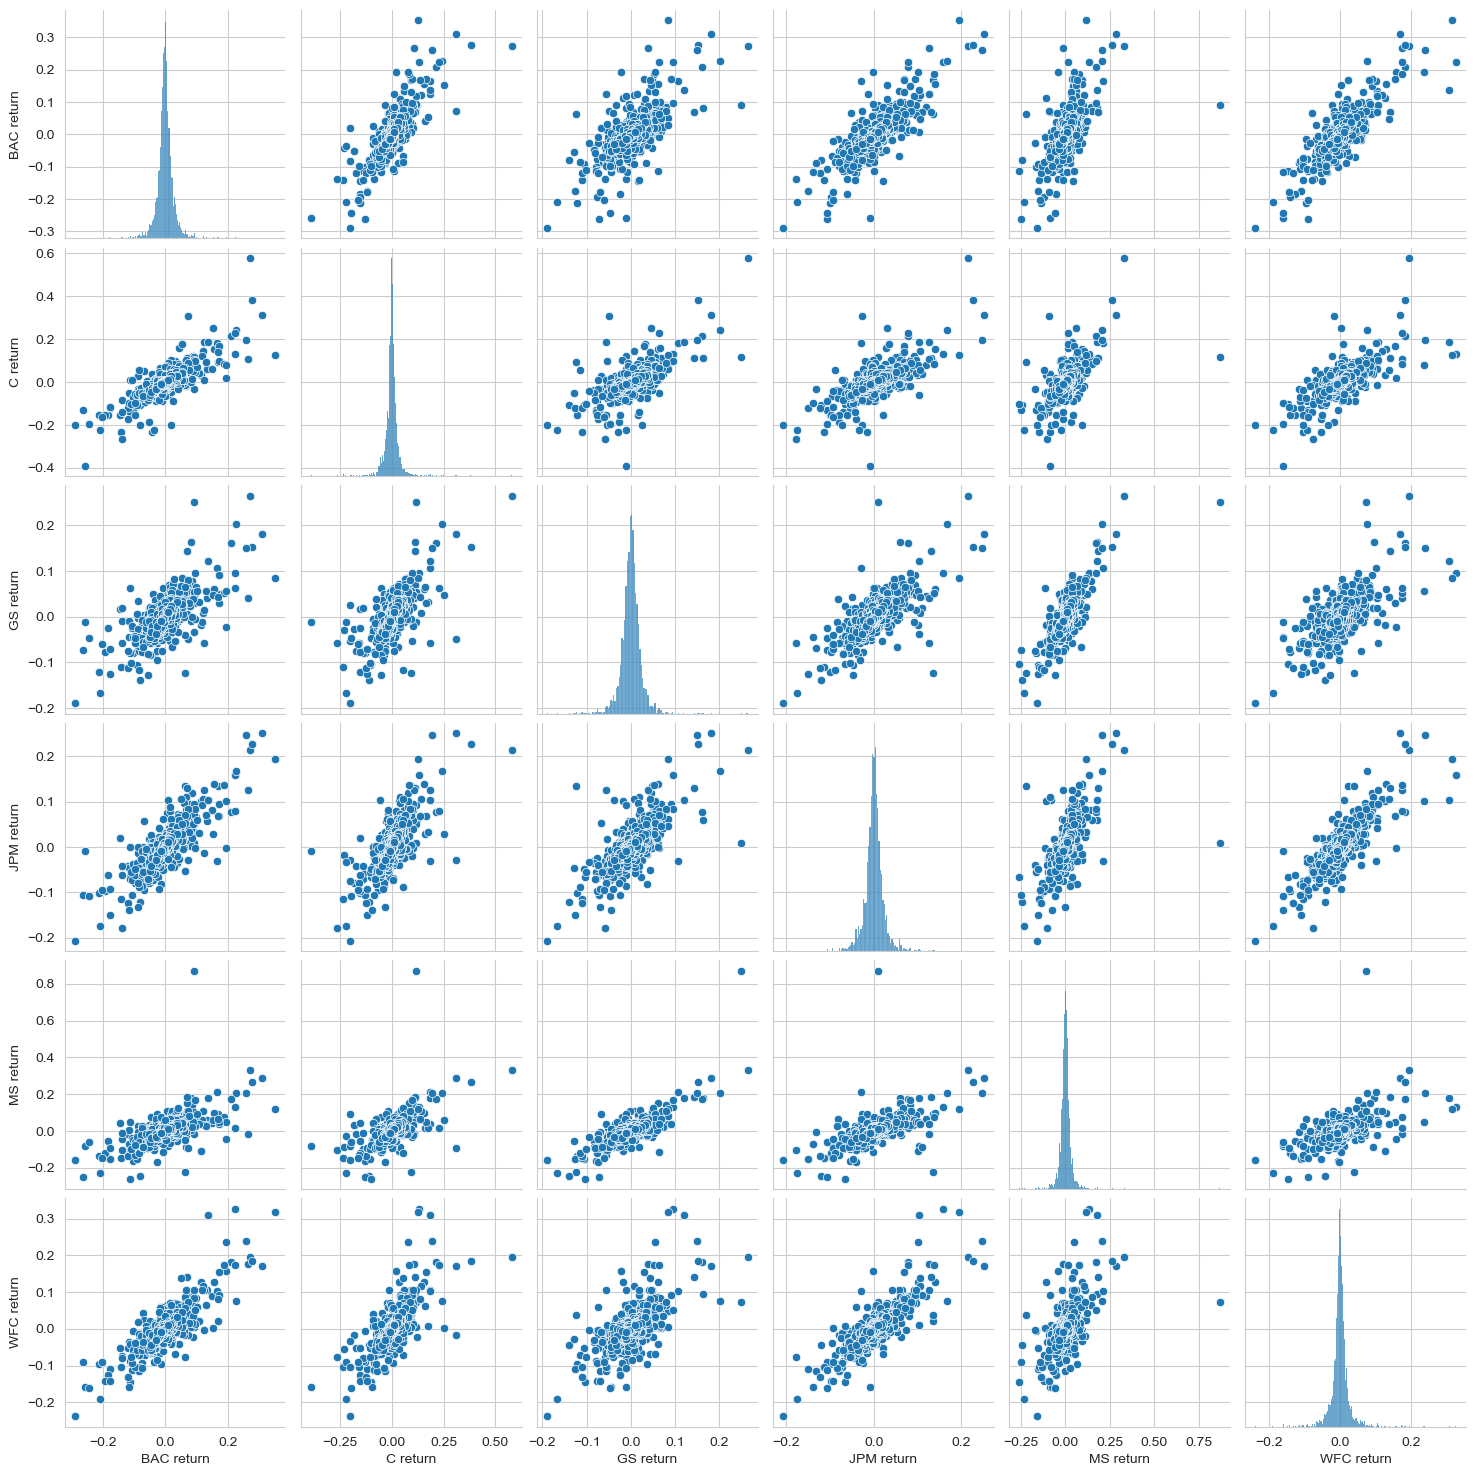

In [292]:
import seaborn as sns
sns.pairplot(returns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [296]:
returns.idxmin()

BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [300]:
returns.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [303]:
returns.std()

BAC return    0.036659
C return      0.038672
GS return     0.025386
JPM return    0.027675
MS return     0.037717
WFC return    0.030195
dtype: float64

In [305]:
returns.loc['2015-01-01': '2015-12-31'].std()

BAC return    0.016174
C return      0.015288
GS return     0.014043
JPM return    0.014006
MS return     0.016287
WFC return    0.012552
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\2689202083.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MS return', ylabel='Density'>

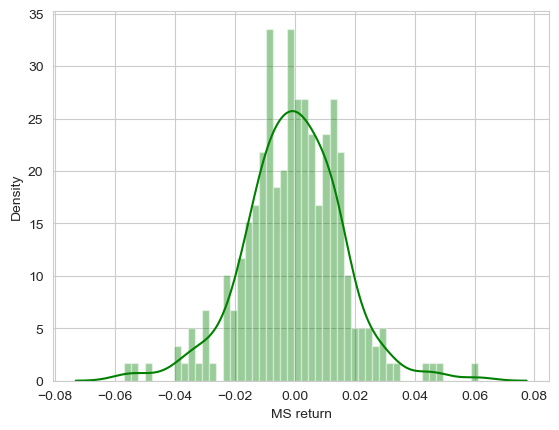

In [308]:
sns.distplot(returns.loc['2015-01-01': '2015-12-31']['MS return'], color='green', bins=50)

C:\Users\fatem\AppData\Local\Temp\ipykernel_5292\338609670.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='C return', ylabel='Density'>

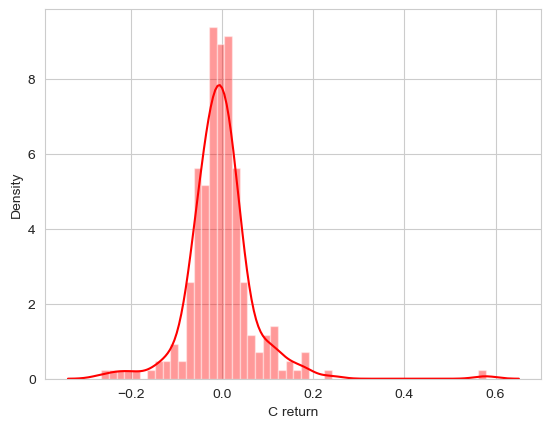

In [310]:
sns.distplot(returns.loc['2008-01-01': '2008-12-31']['C return'], color='red', bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

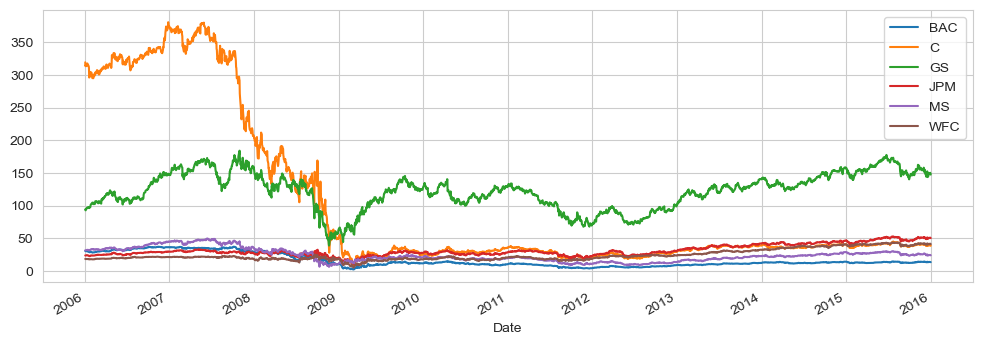

In [317]:
for tick in tickers:
     bank_stocks[tick]['Close'].plot(label= tick, figsize= (12, 4))
plt.legend()

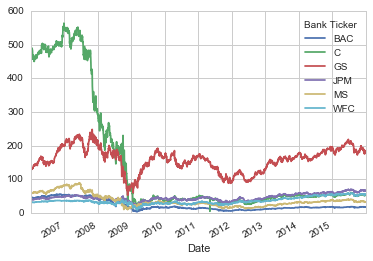

C:\Users\fatem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



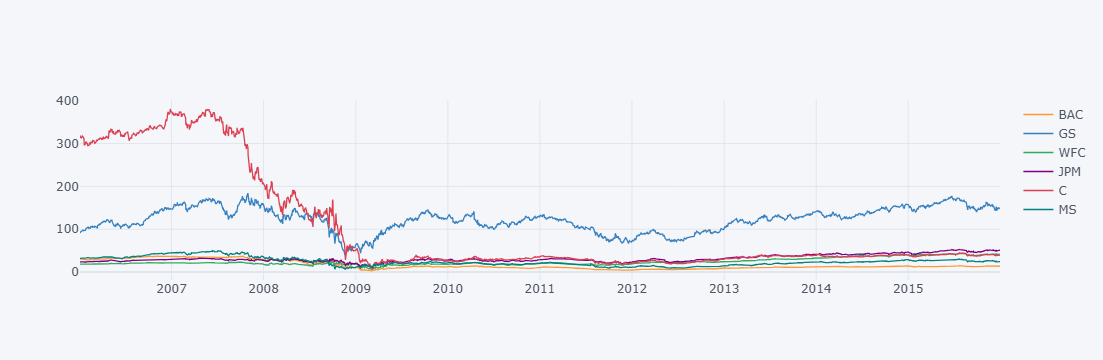

In [325]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<Axes: xlabel='Date'>

<Figure size 1200x600 with 0 Axes>

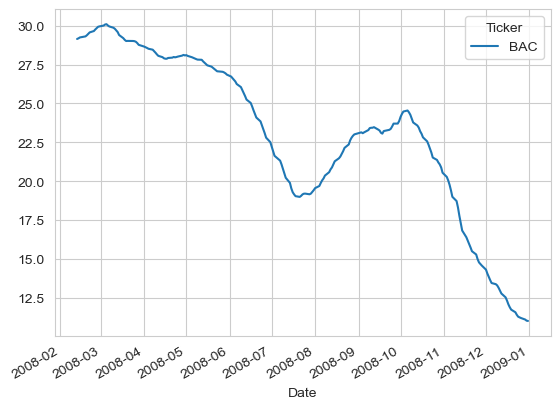

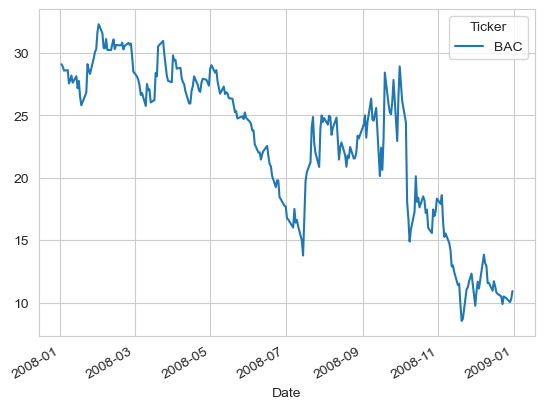

In [328]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01': '2009-01-01'].rolling(window=30).mean().plot(label='30 day Moving AVG')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')

** Create a heatmap of the correlation between the stocks Close Price.**

In [332]:
for tick in tickers:
    print(bank_stocks[tick]['Close'].corr())

TypeError: Series.corr() missing 1 required positional argument: 'other'

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

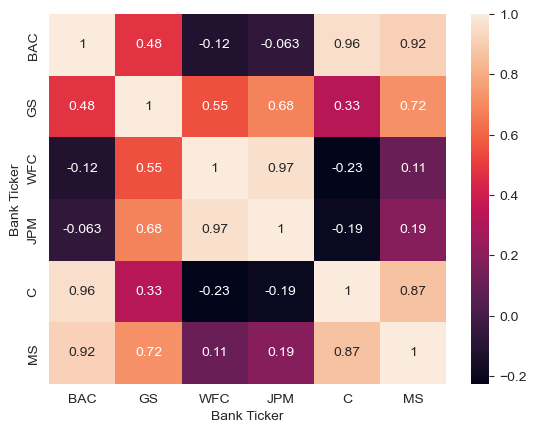

In [334]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

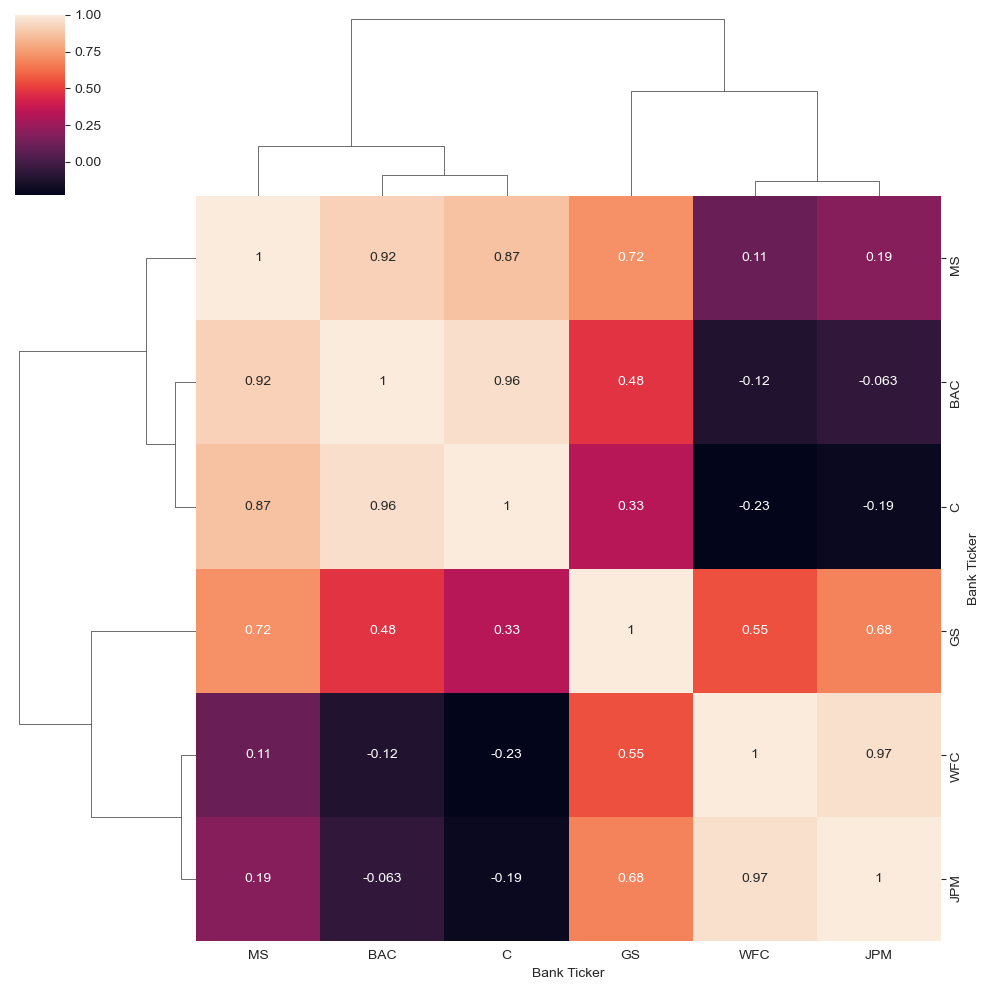

In [336]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

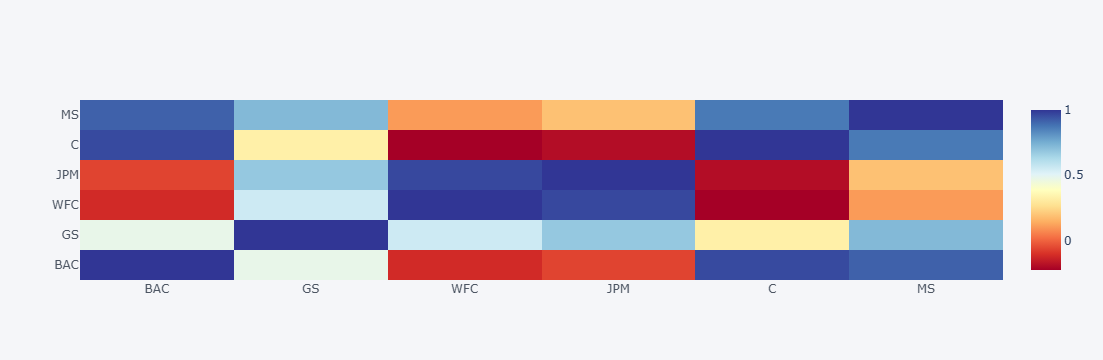

In [338]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [344]:
ohlc = bank_stocks['BAC'][['Open','High','Low','Close']].copy()
ohlc.columns = ['Open','High','Low','Close']  # flatten for cufflinks

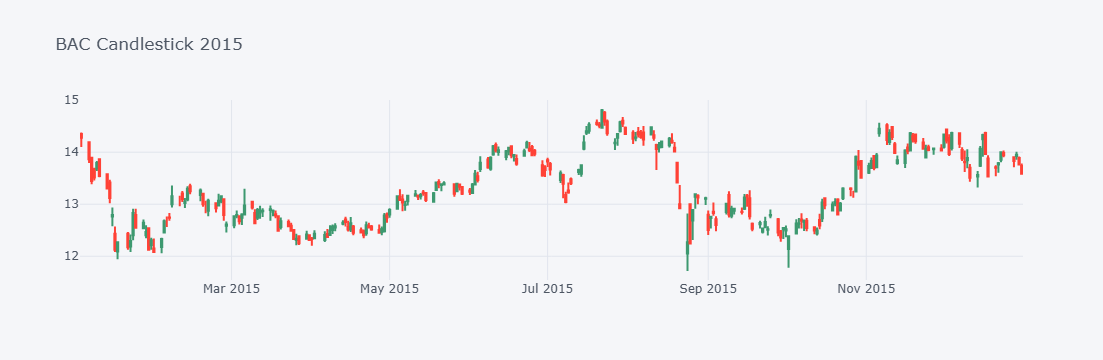

In [346]:
ohlc.loc['2015-01-01':'2016-01-01'].iplot(kind='candle', title='BAC Candlestick 2015')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

C:\Users\fatem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

C:\Users\fatem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



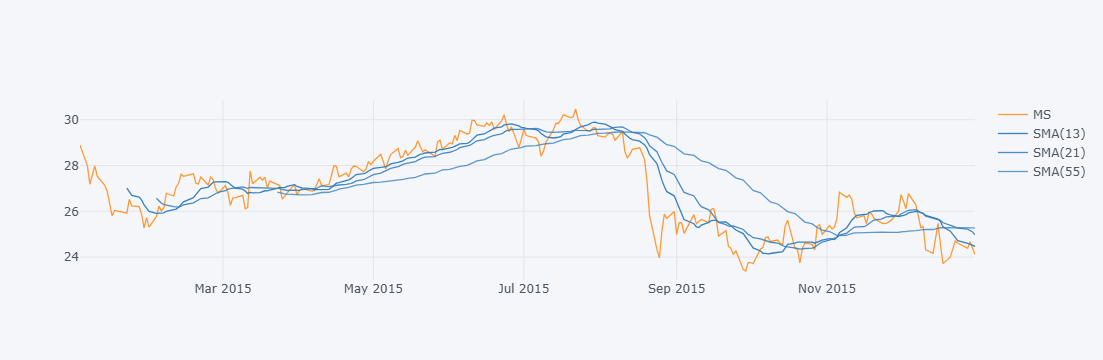

In [352]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

C:\Users\fatem\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



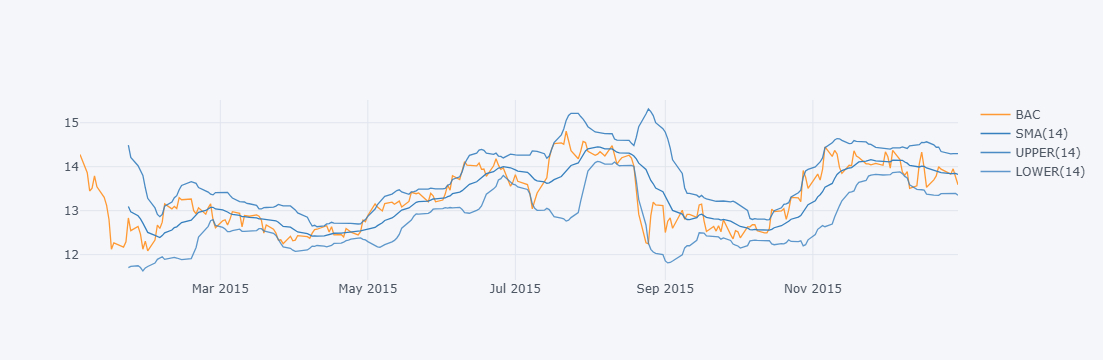

In [356]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.